In [168]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [169]:
sample = pd.read_csv("raw_data/exo_teq_results.csv")

T_star = sample["st_teff"].values
R_star = sample["st_rad"].values
a_planet = sample["pl_orbsmax"].values

#Engineering Features
Feat1 = T_star.copy()
Feat2 = np.sqrt(1 / a_planet)
Feat3 = T_star * np.sqrt(1 / a_planet)
Feat4 = np.log10(T_star)
Feat5 = np.log10(1 / a_planet)



In [170]:
data_train = pd.DataFrame({
    "feat1": Feat1,
    "feat2": Feat2,
    "feat3": Feat3,
    "feat4": Feat4,
    "feat5": Feat5,
    "Teq": sample["Teq"],
    "type": sample["type"]
})

hot_test = data_train[data_train["type"] == "hot"].sample(35)
hotter_test = data_train[data_train["type"] == "hotter"].sample(25)
cold_test = data_train[data_train["type"] == "cold"].sample(5)
temperate_test = data_train[data_train["type"] == "temperate"].sample(15)

data_test = pd.concat([hot_test, hotter_test, cold_test, temperate_test], ignore_index = True)
data_train = data_train.drop(data_test.index)

x_train = data_train[["feat1", "feat2", "feat3","feat4", "feat5"]].values
y_train = data_train["Teq"].values
x_test = data_test[["feat1", "feat2","feat3", "feat4", "feat5"]].values
y_test = data_test["Teq"].values

print(len(data_train), len(data_test))



690 80


In [171]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [172]:
y_pred = linreg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R^2 Score: {r2:.3f}")
print(len(y_pred))

Test RMSE: 83.33
Test R^2 Score: 0.966
80


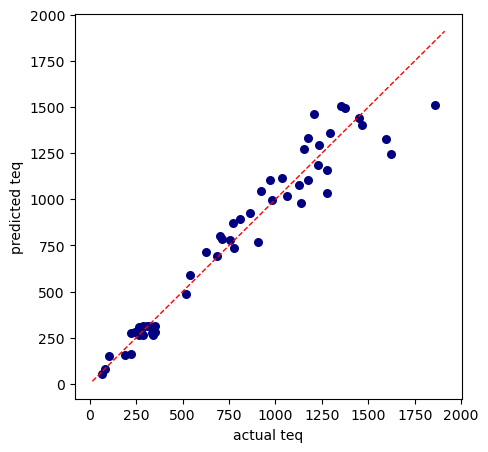

In [162]:
plt.figure(figsize = (5,5))
plt.scatter(y_test, y_pred, color = "navy", s=30)
plt.plot([min(y_test)-50, max(y_test)+50], [min(y_test)-50, max(y_test)+50], "r--", linewidth = 1)
plt.xlabel("actual teq")
plt.ylabel("predicted teq")
plt.show()